random_seed:420
Using device:cpu
data path:dataset\trainset.xlsx
dataframe type:<class 'pandas.core.frame.DataFrame'>
   MaxAbsEStateIndex_A  MaxEStateIndex_A  MinAbsEStateIndex_A  \
0            12.333371         12.333371             0.117904   
1            12.309287         12.309287             0.085637   
2            15.321994         15.321994             0.098623   
3            15.321994         15.321994             0.098623   
4            15.321994         15.321994             0.098623   

   MinEStateIndex_A     qed_A      SPS_A  MolWt_A  HeavyAtomMolWt_A  \
0         -0.371273  0.731490  11.150000  278.312           260.168   
1         -0.906912  0.854030  10.421053  257.289           242.169   
2         -2.301098  0.179801  36.966102  810.989           752.525   
3         -2.301098  0.179801  36.966102  810.989           752.525   
4         -2.301098  0.179801  36.966102  810.989           752.525   

   ExactMolWt_A  NumValenceElectrons_A  ...  fr_sulfide_B  fr_su

C:\Users\hh\AppData\Local\Temp\ipykernel_13364\3364662349.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
C:\Users\hh\AppData\Local\Temp\ipykernel_13364\3364662349.py:55: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
C:\Users\hh\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_neste

Epoch 10/500, Loss: 0.2918, Train Acc: 0.8749
Epoch 20/500, Loss: 0.1278, Train Acc: 0.9481
Epoch 30/500, Loss: 0.0645, Train Acc: 0.9729
Epoch 40/500, Loss: 0.0502, Train Acc: 0.9746
Epoch 50/500, Loss: 0.0455, Train Acc: 0.9752
Epoch 60/500, Loss: 0.0413, Train Acc: 0.9794
Epoch 70/500, Loss: 0.0416, Train Acc: 0.9764
Epoch 80/500, Loss: 0.0541, Train Acc: 0.9758
Epoch 90/500, Loss: 0.0347, Train Acc: 0.9811
Epoch 100/500, Loss: 0.0356, Train Acc: 0.9758
Epoch 110/500, Loss: 0.0315, Train Acc: 0.9805
Epoch 120/500, Loss: 0.0390, Train Acc: 0.9770
Epoch 130/500, Loss: 0.0384, Train Acc: 0.9829
Epoch 140/500, Loss: 0.0379, Train Acc: 0.9788
Epoch 150/500, Loss: 0.0473, Train Acc: 0.9764
Epoch 160/500, Loss: 0.0354, Train Acc: 0.9817
Epoch 170/500, Loss: 0.0332, Train Acc: 0.9799
Epoch 180/500, Loss: 0.0318, Train Acc: 0.9817
Epoch 190/500, Loss: 0.0298, Train Acc: 0.9811
Epoch 200/500, Loss: 0.0347, Train Acc: 0.9799
Epoch 210/500, Loss: 0.0315, Train Acc: 0.9799
Epoch 220/500, Loss: 0

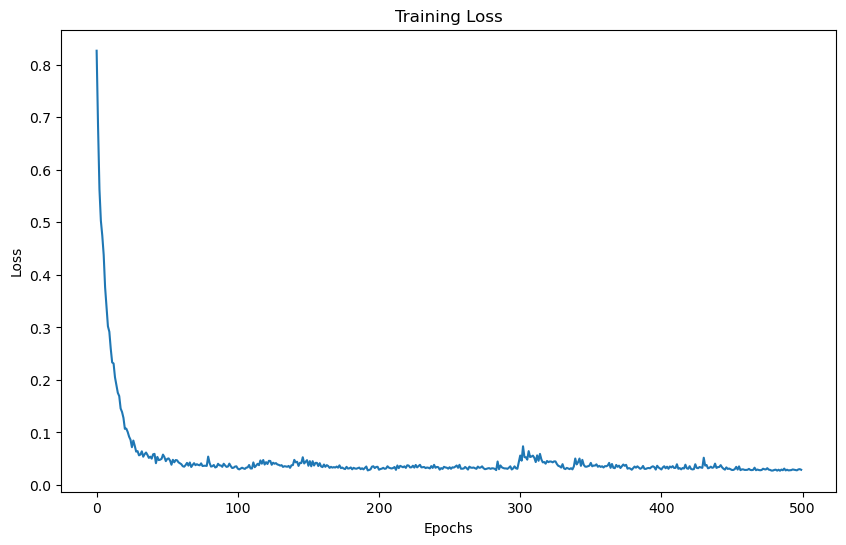

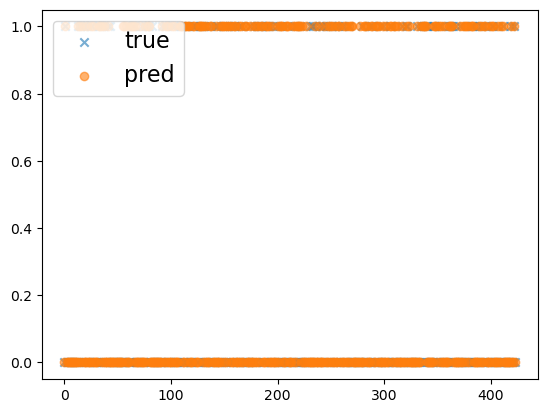

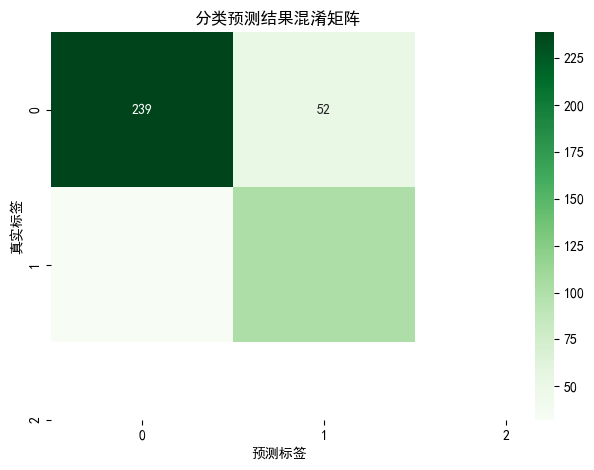

tensor([1, 1, 0,  ..., 0, 0, 0])
      Predicted Class
0                   1
1                   1
2                   0
3                   1
4                   0
...               ...
1948                0
1949                0
1950                0
1951                0
1952                0

[1953 rows x 1 columns]


In [1]:
# 采用新的数据载入方法的注意力机制


# 初始准备

import torch
# 严谨的随机种子设置，为了可复现性：
torch.random.manual_seed(420)
print(f'random_seed:{420}')

#如下体现了的代码规范：
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print (f'Using device:{device}')

import os
MLdata_path = os.path.join('dataset','trainset.xlsx')
print(f"data path:{MLdata_path}")

# 数据导入与清洗
import pandas as pd
dataframe = pd.read_excel(MLdata_path)
dataframe.dropna(inplace=True)
features = dataframe.iloc[:, 5:]
labels = dataframe.iloc[:, 2]
print(f'dataframe type:{type(dataframe)}')
print(features.head(5))
print(labels.head(5))

# 这一步数据的标准化十分重要，效果天差地别。
from sklearn.preprocessing import StandardScaler 
features = StandardScaler().fit_transform(features)            #standardize data 
print(type(features)) #现在已经变成ndarray
print(features[:5,:10])

# 把ndarray格式转化为torch接受的张量。
features = torch.tensor(features, dtype=torch.float32) #因为已经被标准化了，这里不用values了。
labels = torch.tensor(labels, dtype=torch.float32)

print(type(features))

# 数据分割并转化成所需格式
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y = encoder.fit_transform(labels)
print(y)
labels = [[label[0], 1 - label[0]] for label in y]
print(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 转换为 Tensor 数据类型
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score
import numpy as np
from utils.util import *


# 定义 Transformer 模型
class TransformerModel(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_heads, num_layers):
        super(TransformerModel, self).__init__()

        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(input_dim, num_heads, hidden_dim),num_layers
        )
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = x.unsqueeze(1) #维度扩展 (batch_size, 1, input_dim)
        x = self.transformer_encoder(x)
        x = x.squeeze(1)   #维度压缩  (batch_size, hidden_dim)
        x = self.fc(x)
        return x

#定义训练函数
def train_model():
    # 训练模型
    train_losses = []
    train_accs = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()    #梯度清零
        outputs = model(X_train) # 前向传播
        loss = criterion(outputs, torch.argmax(y_train, dim=1))
        loss.backward() # 反向传播和优化
        optimizer.step()

        # 计算训练准确率
        _, predicted = torch.max(outputs, 1)
        train_acc = accuracy_score(torch.argmax(y_train, dim=1).cpu().numpy(), predicted.cpu().numpy())

        # 记录损失和准确率
        train_losses.append(loss.item())
        train_accs.append(train_acc)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}')

    return train_losses,train_accs


#定义测试函数
def test_model():
    # 在测试集上评估模型
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        print(predicted)
        test_acc = accuracy_score(torch.argmax(y_test, dim=1).cpu().numpy(), predicted.cpu().numpy())
        print("test_acc",test_acc)
    return  test_acc,predicted

#超参数

hidden_dim = 64 #编码器和解码器内部隐藏层的维度大小
num_heads = 2   # embed_dim must be divisible by num_heads  4/num_heads 整除
num_layers = 2  #编码器和解码器的层数
num_epochs = 500 #训练轮次

input_dim = X_train.shape[1] #计算input_dim
output_dim = y_train.shape[1] #output_dim
model = TransformerModel(input_dim, output_dim, hidden_dim, num_heads, num_layers).to(device) # 实例化模型
optimizer = optim.Adam(model.parameters(), lr=0.001) #优化器
criterion = nn.CrossEntropyLoss()     #损失函数
train_losses,train_accs = train_model() #训练
test_accs, predicted = test_model()    #测试

pltloss(train_losses) #绘训练集损失
labels = np.argmax(y_test.cpu(), axis=1)  #计算实际值
drawScatter([labels.cpu(), predicted.cpu()], ['true', 'pred'])   #绘制散点图
plot_confusion(labels.cpu(),predicted.cpu())    #绘制混淆矩阵


# 保存模型

torch.save(model.state_dict(), 'model_parameters.pth')

# 导入预测集数据进行预处理
import pandas as pd
PredictData_path = os.path.join('dataset','predict.xlsx')

dataframe = pd.read_excel(PredictData_path)
dataframe.dropna(inplace=True)
features = dataframe.iloc[:, 5:]
features = StandardScaler().fit_transform(features)            #standardize data 
features = torch.tensor(features, dtype=torch.float32).to(device)

# 加载训练好的模型用于预测

model.load_state_dict(torch.load('model_parameters.pth'))
model.eval()
with torch.no_grad():
    outputs = model(features)
    _, predicted = torch.max(outputs, 1)
    print(predicted)
predicted_numpy = predicted.cpu().numpy()
df = pd.DataFrame(predicted_numpy, columns=['Predicted Class'])
print(df)
df.to_csv('predicted_results.csv', index=False)


In [2]:
# 定义绘制准确率变化的函数
def plot_accuracy(train_accs):
    plt.figure()
    plt.plot(range(1, num_epochs + 1), train_accs, label='Train Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Training Epochs')
    plt.legend()
    plt.show()

# 训练模型并记录准确率
train_losses, train_accs = train_model_with_accuracy()

# 测试模型并计算R平方和F1指数
test_r2, test_f1 = test_model_with_metrics()

# 绘制准确率随训练轮次变化的曲线
plot_accuracy(train_accs)

NameError: name 'train_model_with_accuracy' is not defined

In [2]:

# 导入预测集数据进行预处理
import pandas as pd
PredictData_path = os.path.join('dataset','predict.xlsx')

dataframe = pd.read_excel(PredictData_path)
dataframe.dropna(inplace=True)
features = dataframe.iloc[:, 5:]
features = StandardScaler().fit_transform(features)            #standardize data 
features = torch.tensor(features, dtype=torch.float32).to(device)

# 加载训练好的模型用于预测

model.load_state_dict(torch.load('model_parameters.pth'))
model.eval()
with torch.no_grad():
    outputs = model(features)
    _, predicted = torch.max(outputs, 1)
    print(predicted)
predicted_numpy = predicted.cpu().numpy()
df = pd.DataFrame(predicted_numpy, columns=['Predicted Class'])
print(df)
df.to_csv('predicted_results.csv', index=False)


NameError: name 'os' is not defined

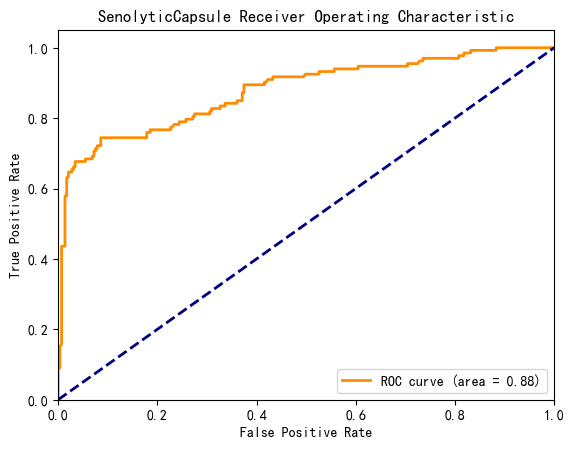

AUC: 0.8766633077539209


In [5]:
# 需要的库
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# 在测试集上评估模型
def test_model_with_auc():
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        # 获取预测的概率
        probs = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        # 获取真实的标签
        true_labels = torch.argmax(y_test, dim=1).cpu().numpy()
        # 计算ROC曲线和AUC
        fpr, tpr, thresholds = roc_curve(true_labels, probs.cpu().numpy())
        roc_auc = auc(fpr, tpr)
        
        # 绘制ROC曲线
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('SenolyticCapsule Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
        
        print("AUC:", roc_auc)
        
    return roc_auc, fpr, tpr

# 调用测试函数并绘制AUC评估曲线
test_auc, test_fpr, test_tpr = test_model_with_auc()


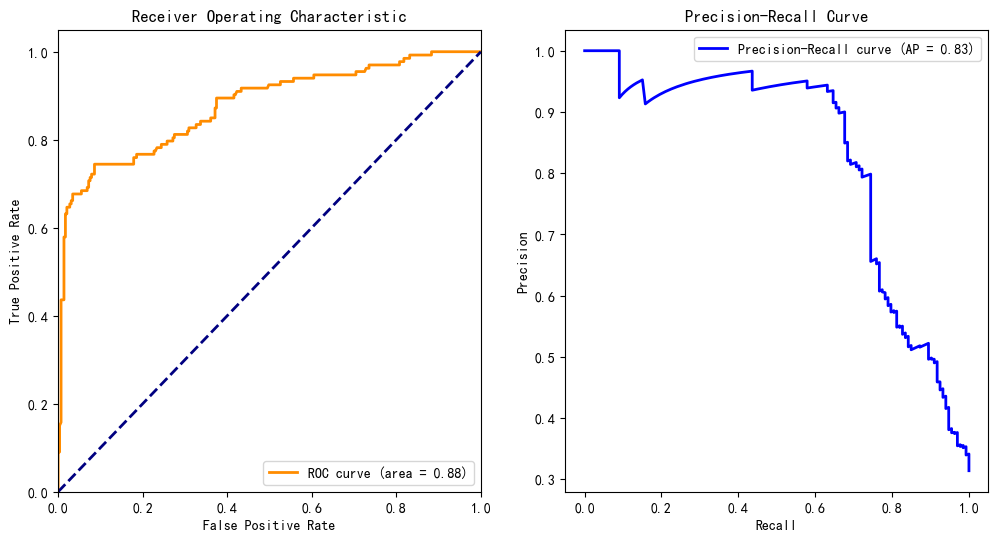

AUC: 0.8766633077539209
Average Precision: 0.827054019915421


In [6]:
# 需要的库
from sklearn.metrics import precision_recall_curve, f1_score, average_precision_score
import matplotlib.pyplot as plt

# 在测试集上评估模型
def test_model_with_evaluation_curves():
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        # 获取预测的概率
        probs = torch.nn.functional.softmax(outputs, dim=1)[:, 1]
        # 获取真实的标签
        true_labels = torch.argmax(y_test, dim=1).cpu().numpy()
        
        # 计算ROC曲线和AUC
        fpr, tpr, thresholds = roc_curve(true_labels, probs.cpu().numpy())
        roc_auc = auc(fpr, tpr)
        
        # 计算精确率-召回率曲线和平均精确率
        precision, recall, _ = precision_recall_curve(true_labels, probs.cpu().numpy())
        average_precision = average_precision_score(true_labels, probs.cpu().numpy())
        
        # 绘制ROC曲线
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        
        # 绘制精确率-召回率曲线
        plt.subplot(1, 2, 2)
        plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="upper right")
        
        plt.show()
        
        print("AUC:", roc_auc)
        print("Average Precision:", average_precision)
        
    return roc_auc, average_precision, fpr, tpr, precision, recall

# 调用测试函数并绘制评估曲线
test_auc, test_average_precision, test_fpr, test_tpr, test_precision, test_recall = test_model_with_evaluation_curves()


Epoch 10/500, Loss: 0.0850, Train Acc: 0.9664
Epoch 20/500, Loss: 0.0521, Train Acc: 0.9752
Epoch 30/500, Loss: 0.0424, Train Acc: 0.9782
Epoch 40/500, Loss: 0.0400, Train Acc: 0.9794
Epoch 50/500, Loss: 0.0459, Train Acc: 0.9764
Epoch 60/500, Loss: 0.0429, Train Acc: 0.9788
Epoch 70/500, Loss: 0.0369, Train Acc: 0.9794
Epoch 80/500, Loss: 0.0458, Train Acc: 0.9811
Epoch 90/500, Loss: 0.0398, Train Acc: 0.9776
Epoch 100/500, Loss: 0.0355, Train Acc: 0.9794
Epoch 110/500, Loss: 0.0362, Train Acc: 0.9799
Epoch 120/500, Loss: 0.0353, Train Acc: 0.9799
Epoch 130/500, Loss: 0.0416, Train Acc: 0.9740
Epoch 140/500, Loss: 0.0338, Train Acc: 0.9799
Epoch 150/500, Loss: 0.0352, Train Acc: 0.9799
Epoch 160/500, Loss: 0.0331, Train Acc: 0.9823
Epoch 170/500, Loss: 0.0350, Train Acc: 0.9788
Epoch 180/500, Loss: 0.0300, Train Acc: 0.9811
Epoch 190/500, Loss: 0.0307, Train Acc: 0.9794
Epoch 200/500, Loss: 0.0328, Train Acc: 0.9788
Epoch 210/500, Loss: 0.0362, Train Acc: 0.9758
Epoch 220/500, Loss: 0

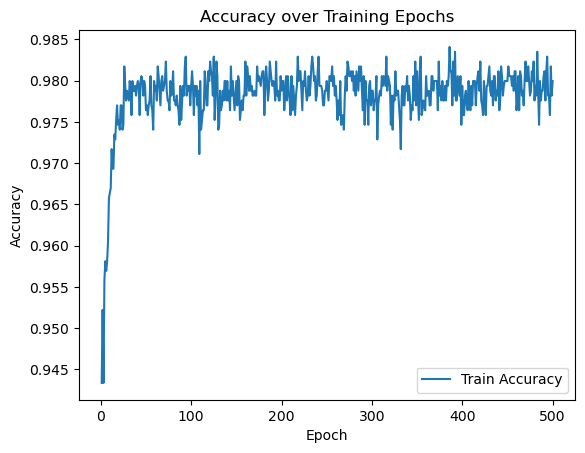

In [3]:
# 需要的库
from sklearn.metrics import r2_score, f1_score
import matplotlib.pyplot as plt

# 定义训练函数，并记录每个epoch的准确率
def train_model_with_accuracy():
    train_losses = []
    train_accs = []

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()    # 梯度清零
        outputs = model(X_train) # 前向传播
        loss = criterion(outputs, torch.argmax(y_train, dim=1))
        loss.backward() # 反向传播和优化
        optimizer.step()

        # 计算训练准确率
        _, predicted = torch.max(outputs, 1)
        train_acc = accuracy_score(torch.argmax(y_train, dim=1).cpu().numpy(), predicted.cpu().numpy())

        # 记录损失和准确率
        train_losses.append(loss.item())
        train_accs.append(train_acc)

        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}, Train Acc: {train_acc:.4f}')

    return train_losses, train_accs

# 定义测试函数，并计算R平方和F1指数
def test_model_with_metrics():
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        true_labels = torch.argmax(y_test, dim=1).cpu().numpy()
        
        # 计算R平方和F1指数
        r2 = r2_score(true_labels, predicted.cpu().numpy())
        f1 = f1_score(true_labels, predicted.cpu().numpy(), average='weighted')
        
        print("R^2:", r2)
        print("F1 Score:", f1)
        
        return r2, f1

# 定义绘制准确率变化的函数
def plot_accuracy(train_accs):
    plt.figure()
    plt.plot(range(1, num_epochs + 1), train_accs, label='Train Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Training Epochs')
    plt.legend()
    plt.show()

# 训练模型并记录准确率
train_losses, train_accs = train_model_with_accuracy()

# 测试模型并计算R平方和F1指数
test_r2, test_f1 = test_model_with_metrics()

# 绘制准确率随训练轮次变化的曲线
plot_accuracy(train_accs)
